In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read in membership data and trim to "recent" visits
edges = pd.read_csv('data\\memberships.csv', parse_dates=['joined','visited'])
edges = edges.loc[edges.visited > pd.to_datetime('2016-01-01')]

# create a "members" dataset
members = edges[['member_id', 'name', 'hometown', 'city','state', 'lat', 'lon']].groupby('member_id').first()
members['num_groups'] = edges[['member_id']].groupby('member_id').size()

# read in group information and trim down to only groups with edges
groups = pd.read_csv('data\\groups.csv', index_col='group_id')
groups = groups.loc[edges.group_id.unique()]

rsvps = pd.read_csv('data\\rsvps.csv')
events = pd.read_csv('data/events.csv', index_col='event_id')

events['rsvps_calc'] = rsvps.groupby('event_id').size()
members['events_attended'] = rsvps.groupby('member_id').size()
members.events_attended = members.events_attended.fillna(0)

groups = pd.merge(groups, events.groupby('group_urlname').agg({'time': len, 'yes_rsvp_count': max, 'rsvps_calc': np.median}), 
         left_on='group_urlname', right_index=True, how='left')
attendance = pd.merge(rsvps, groups.reset_index(), on='group_urlname').groupby(['member_id', 'group_id']).size().reset_index()
attendance = attendance.rename_axis({0: 'weight'}, axis=1)

In [122]:
nx.Graph.add_nodes_from?

In [133]:
attendance.shape

(45583, 3)

In [128]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from([(n, {'class': 'member'}) for n in attendance.member_id])
g.add_nodes_from([(n, {'class': 'group'}) for n in attendance.group_id])

In [132]:
print('There are {} group members.'.format(len([n for n, d in g.nodes(data=True) if d['class'] == 'member'])))
print('There are {} groups.'.format(len([n for n, d in g.nodes(data=True) if d['class'] == 'group'])))

There are 24631 group members.
There are 602 groups.


In [146]:
g.add_edges_from([(s.member_id, s.group_id) for ind, s in attendance.iterrows()])
g.edges(data=True)[0:5]

[(2069, 405938, {'events': 3}),
 (2069, 11625832, {'events': 4}),
 (2069, 11862932, {'events': 2}),
 (2069, 17467312, {'events': 1}),
 (2069, 17872862, {'events': 1})]

In [141]:
edge_weights = {(s.member_id, s.group_id): s.weight for ind, s in attendance.iterrows()}
nx.set_edge_attributes(g, 'events', edge_weights)

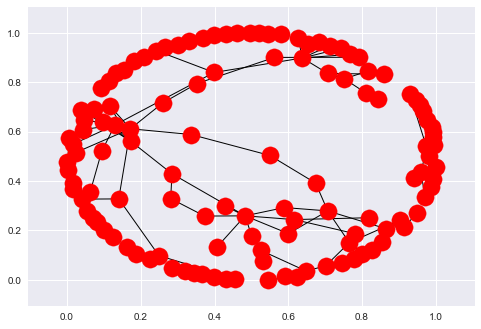

In [180]:
pos = nx.circular_layout(B)
# node_colors = ['blue' if d['weight'] == 'member' for n,d in B.nodes(data=True)]
nx.draw_networkx(B, with_labels=False)

plt.show()

In [173]:
B = nx.from_pandas_dataframe(attendance.iloc[0:100], source='member_id', target='group_id', edge_attr=['weight'])

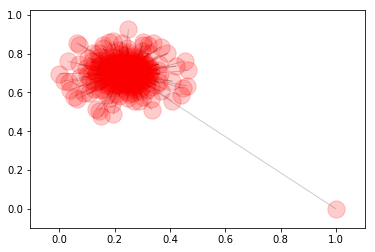

In [54]:
thresholded_edges = [(u,v,d) for u,v,d in gm.edges(data=True) if (d['weight'] > 4) & (not 'PyNash' in [u,v])]
subgraph = nx.Graph(thresholded_edges)
subgraph = subgraph.subgraph(list(nx.connected_components(subgraph))[0])

pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=False, alpha=0.2)
plt.show()

{'#Resist: Nashville',
 "'A Course in Miracles' Nashville Meetup",
 "'Boro 20s & 30s",
 "'BoroDev",
 "'BoroDev Breakfast",
 '10X Revolution Nashville',
 '20&UP Tennis League: Nashville',
 "20's & 30's Women looking for girlfriends",
 '20s in Nashville',
 '20s/30s Nashville Online Dating Rebellion!',
 '615 LOL (Live Out Loud)',
 'A Course in Miracles Study Group, Nashville',
 'Active Outdoors Nashville',
 'Advanced Audio + Applications Exchange (A3E) - Nashville',
 'Agile Nashville User Group',
 'All Things Angular',
 'Ambrosia - Friends, Food and Fun',
 'Amway Business Opportunity Info Session',
 'Art of Living',
 'Art, Culture, Film and Literature Friends',
 'BIG FUN GAME nite',
 'Beer and Bible Nashville',
 'Bellevue Business Networking Meetup',
 'Bellevue Free Mandarin/Korean Lessons Meetup',
 'Big East Fork Folk / Jazz Music Meetup',
 'Big East Fork Hiking & Breakfast Club',
 'Blockchain Technology Disrupting Healthcare',
 'Blues Dance Nashville',
 'Board Game Lovers Meetup',
 'Boo

In [ ]:
thresh = 0.00037411148522259631
edge_weights = [(u,v) for u,v,d in mg.edges(data=True) if d['weight'] > thresh]

plt.hist(edge_weights, bins=100)
plt.xlim([0,0.005])
plt.show()

In [ ]:
plt.spy(nx.adjacency_matrix(mg[edge_weights]))
plt.show()